# Normal (a.k.a. Gaussian) Distribution

Symmetric, bell-shaped, and thin-tails

Data occuring near the mean is more frequent

The basis of some statistical methods e.g. regression normalization of errors

68-95-99.7 rule . . . 68% percent of observations occur within 1 s.d. of the mean etc.

# Wine Quality

In [5]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import seaborn as sns

In [6]:
df = pd.read_csv("wine_quality.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:ylabel='Density'>

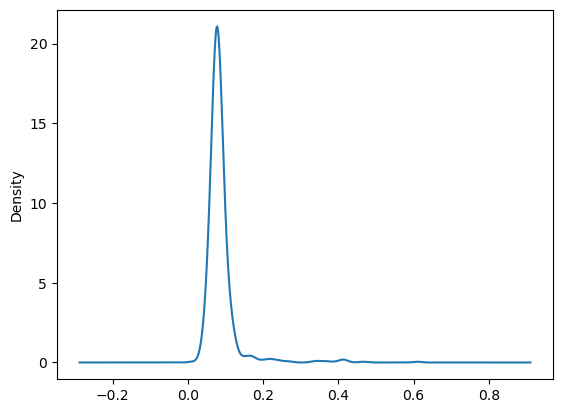

In [9]:
#Density plot for chlorides

df.chlorides.plot.density()

In [16]:
#Portion of observations within 'x' standard deviations?

#within +1 or -1 standard deviation
print(df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() + -1 * df.chlorides.std())].chlorides.count()/df.chlorides.count())
#within +2 or -2 standard deviation
print(df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() + -2 * df.chlorides.std())].chlorides.count()/df.chlorides.count())
#within +3 or -3 standard deviation
print(df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() + -3 * df.chlorides.std())].chlorides.count()/df.chlorides.count())

0.9480925578486554
0.9718574108818011
0.9806128830519074


The percentage of chloride observations that occur within 1, 2 and 3 standard deviations of the mean suggest that chlorides are not normally distributed. This confirms what we could observe in the density plot.

In [21]:
#Portion of alcohol observations within 3 standard deviations?

df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) & 
       (df.alcohol >= df.alcohol.mean() + -3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

<AxesSubplot:ylabel='Density'>

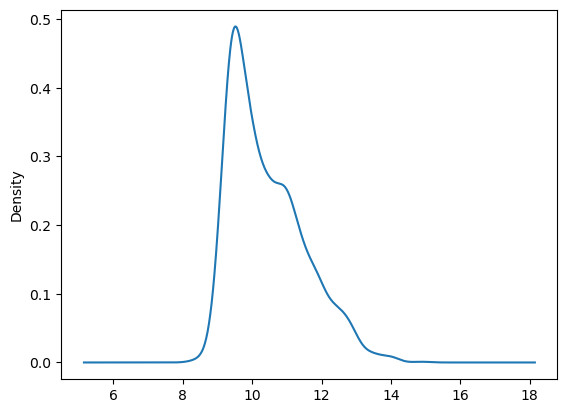

In [22]:
df.alcohol.plot.density()

# P-Value

Assuming the null hypothesis is correct, the P-value is the  probability (so, 0 to 1) of obtaining results at least as extreme as the observed results of a statistical hypothesis. A lower p-value means greater certainty. 

Understanding the likelihood of accepting/failing to reject (we cannot prove a negative, analogous to not guilty as opposed to no innocent) the null hypothesis.

## Examples

H0: Average salary is £60,000.00

H1: Average salary is not equal to £60,000.00

A t-test is performed, returning a p-value of 0.2. Using the threshold of 0.05, comparing to the p-value of 0.2 we fail to reject the null hypothesis. This result does not conclusively reveal the null hypothesis to be true or false, we need more evidence.

# Shapiro-Wilk test

Likelihood data was drawn from a Gaussian distribution.

H0: The distribution is normal.

H1: The distribution is not normal.

Uses a threshold of 0.05.

In [41]:
# Shapiro-Wilk Test

stat = st.shapiro(df.chlorides).statistic 
pvalue = st.shapiro(df.chlorides).pvalue

print(pvalue)
if pvalue > 0.05:
    print("H0, that the sample distribution is normal, could not be rejected.")
else: 
    print("H0, that the sample distribution is normal, was rejected.")

0.0
H0, that the sample distribution is normal, was rejected.


<AxesSubplot:ylabel='Density'>

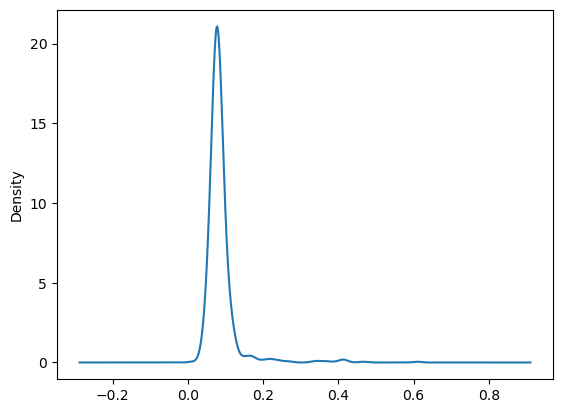

In [37]:
df.chlorides.plot.density()

In [40]:
#Determine whether the observations for sulfites are normally distributed? 

sulphates_pvalue = st.shapiro(df.sulphates).pvalue

if sulphates_pvalue > 0.05:
    print(f""" P-value is {sulphates_pvalue}. 
          
H0, that the sample distribution is normal, could not be rejected.""")
else:
    print(f"""P-value is {sulphates_pvalue}. 
          
H0, that the sample distribution is normal, was rejected.""")

P-value is 5.821617678881608e-38. 
          
H0, that the sample distribution is normal, was rejected.


<AxesSubplot:ylabel='Density'>

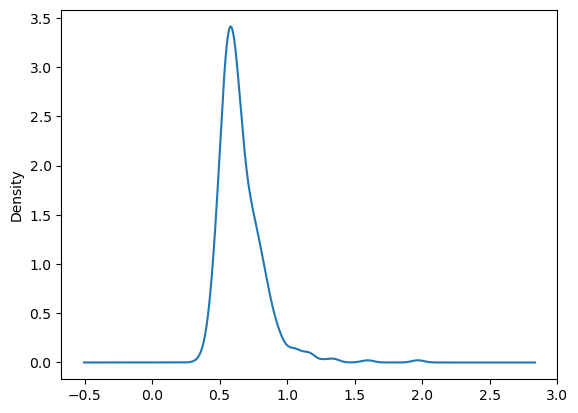

In [34]:
df.sulphates.plot.density()

# The Standard Error (of the sample mean)


What is the difference between the Standard Deviation and the Standard Error? 

The standard error of the sample mean is an estimate of how far the sample mean is likely to be from the population mean. Compared to standard deviation is the degree to which individuals within the sample differ from the sample mean.

The sample mean is often used to test hypothesis.

# $ {\mathop {SE}} = \frac{{\sigma}}{\sqrt n} $

## Calculating the S.E.

In [42]:
#Using a function

st.sem(df.alcohol)

0.026650018979018173

In [46]:
# Computing sd/sqrt. n

df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018118

In [47]:
#Standard error of pH

print(st.sem(df.pH),
     df.pH.std() / m.sqrt(df.pH.count()))

0.0038608683325203784 0.0038608683325203753


# Z-Score

How far from the mean a data point is.

Can be used to compare results to a 'normal' population.

### z = x - mu / stdev.

Standardising values for comparison, the z-table will tell you within how many standard deviations of the mean the data point is e.g. 1.5

# Confidence Interval (when n > 30)

A range indicating how precisely a statistic estimates a parameter.

### CI = x-bar +- z * stdev / sqrt. n

In [57]:
#CI for the mean of citric acid

print(st.norm.interval(confidence = 0.95,
                loc = df[['citric acid']].mean(),
                scale = st.sem(df[['citric acid']])))


(array([0.26142755]), array([0.28052367]))


array([[<AxesSubplot:title={'center':'citric acid'}>]], dtype=object)

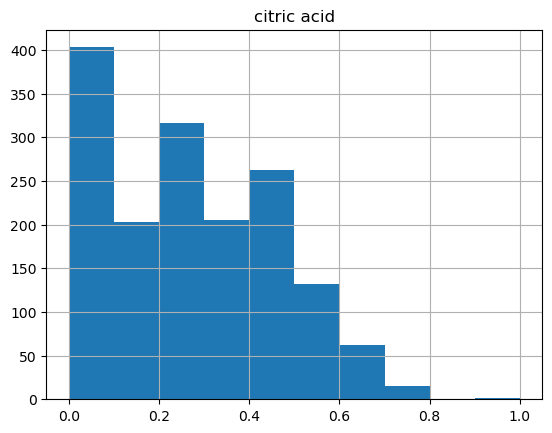

In [63]:
df[['citric acid']].hist()

In [65]:
#CI for mean of density

print(st.norm.interval(confidence = 0.95,
                      loc = df[['density']].mean(),
                      scale = st.sem(df[['density']])))

(array([0.99665417]), array([0.99683919]))


array([[<AxesSubplot:title={'center':'density'}>]], dtype=object)

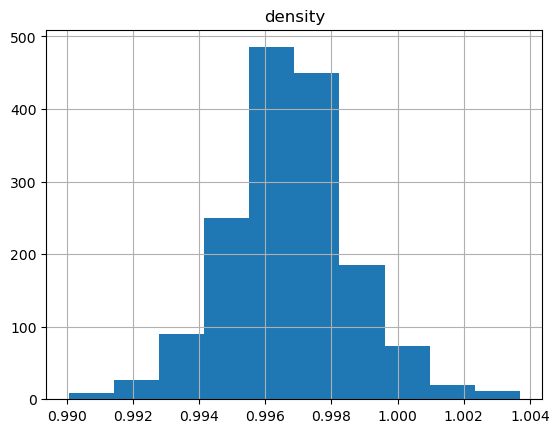

In [66]:
#Histogram for density mean
df[['density']].hist()

# T-Tests

Used to test any statistical hypothesis in which the test statistic follows a Student's-T distribution under the null hypothesis.

In practice, the T-test can help us to understand whether one group is statistically different from another. If the p-value is less than the threshold, then the groups can be considered statistically different.

# Stack Overflow's Remote Working Dataset

In [67]:
so_df = pd.read_csv('stackoverflow.csv')
so_df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
#Subset the data

uk_salary = so_df.loc[so_df.Country == 'United Kingdom'].Salary
uk_salary

0       100000.0
11       32500.0
12       30000.0
17       32500.0
18       43750.0
          ...   
5575     53750.0
5577     45000.0
5580     43750.0
5589     88750.0
5592     33750.0
Name: Salary, Length: 1023, dtype: float64

In [75]:
de_salary = so_df.loc[so_df.Country == 'Germany'].Salary
de_salary

3       64516.129030
7       53763.440860
9       83870.967740
25      10752.688170
43      59139.784950
            ...     
5570    60215.053760
5571    48387.096770
5574    69892.473120
5578     8602.150538
5579    41935.483870
Name: Salary, Length: 757, dtype: float64

In [79]:
stat, p = st.ttest_ind(a = uk_salary, b= de_salary)

#why is a t-test being used for a group with so many observations, Student's-T should be =< 30 observations?

if p > 0.05:
    print(f'P-value is {p}, so they groups of data are not statistically different. Failed to reject H0.')
else:
    print(f'P-value is {p}, so they groups of data can be considered statistically different. H0 rejected.')

P-value is 0.026389999555203502, so they groups of data can be considered statistically different. H0 rejected.


In [86]:
#T-Test in experience between India and the United States 

in_experience = so_df.loc[so_df.Country == 'India'].YearsCodedJob

us_experience = so_df.loc[so_df.Country == 'United States'].YearsCodedJob

stat, p = st.ttest_ind(a = in_experience, b = us_experience)

if p > 0.05:
    print(f'P-value is {p}, so the groups of data are not statistically different. Failed to reject H0.')
else:
    print(f'P-value is {p}, so the groups of data can be considered statistically different. H0 rejected.')

P-value is 5.225676347614714e-58, so they groups of data can be considered statistically different. H0 rejected.


<AxesSubplot:>

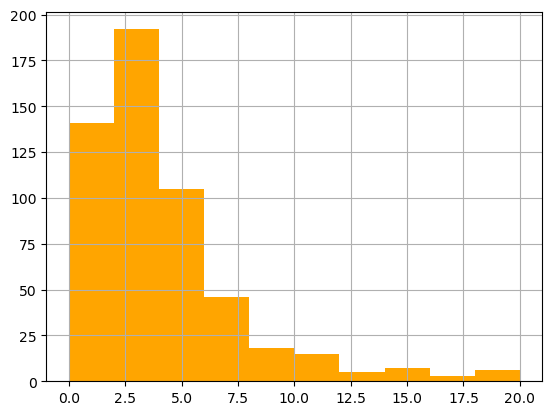

In [94]:
#Histograms

in_experience.hist(color = 'orange')

<AxesSubplot:>

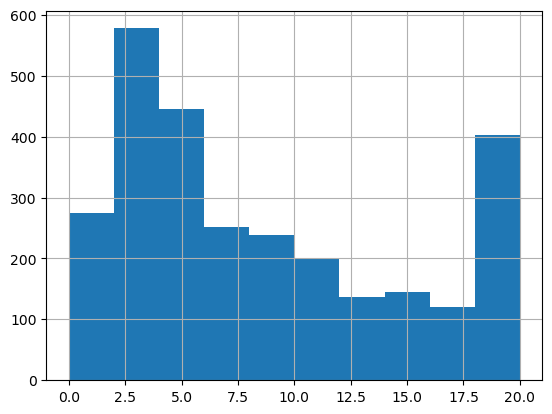

In [93]:
us_experience.hist()

# (Pearson) Chi-square test

Is there a statistically significant difference between the expected frequencies and the observed frequencies?

T-test tests a null hypothesis about two means.

A chi-squared test requires categorical variables

In [96]:
#Is there a relationship between country and number working remotely?

#cross tabulation

tab = pd.crosstab(index = so_df.Country,
                 columns = so_df.Remote)

tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [98]:
st.chi2_contingency(tab)

(78.67672415412689,
 3.321120877301216e-16,
 4,
 array([[ 435.14747944,   49.85252056],
        [ 679.18895245,   77.81104755],
        [ 482.69967823,   55.30032177],
        [ 917.84715767,  105.15284233],
        [2504.11673221,  286.88326779]]))

In [102]:
chi2, p, dof, expected = st.chi2_contingency(tab)
print(p)

if p > 0.05:
    print(f'P-value is {p}, there is no relationship. Failed to reject H0.')
else:
    print(f'P-value is {p}, there is a relationship. H0 rejected.')

3.321120877301216e-16
P-value is 3.321120877301216e-16, there is a relationship. H0 rejected.


In [103]:
#Is there a relationship between company size and hobbies?

tab = pd.crosstab(index = so_df.CompanySizeNumber,
                 columns = so_df.Hobby)

tab

Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


In [104]:
chi2, p, dof, expected = st.chi2_contingency(tab)
print(p)

if p > 0.05:
    print(f'P-value is {p}, there is no relationship. Failed to reject H0.')
else:
    print(f'P-value is {p}, there is a relationship. H0 rejected.')

0.025708455559671047
P-value is 0.025708455559671047, there is a relationship. H0 rejected.
